# Prov på mig själv

In [1]:
import pandas as pd                                                        
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")
import seaborn as sns
import datetime as dt

In [2]:
art_data = pd.read_csv("/Users/alvinalindqvist/Desktop/artportalen.csv")

### What are the most prevelant species?

In [3]:
art_data = art_data.replace(["noterad", "Ej återfunnen"], [1,0])
art_data["Antal"] = pd.to_numeric(art_data["Antal"])

pd.set_option('display.max_columns', None) 

In [4]:
top = art_data.loc[:,['Artnamn', 'Antal']]
top = top.groupby('Artnamn').sum()
top = top.sort_values(by = 'Antal', ascending = False)
top

,Antal
Artnamn,
Grönsiska,20237
Sothöna,8393
Gräsand,7296
Storskrake,6800
Vitkindad gås,6391
...,...
Fjällvråk,1
Forsärla,1
Rosenfink,1


## Månadsvis fördelning för top 3 

In [5]:
top3_distr = art_data.loc[:,['Artnamn', 'Startdatum', 'Antal']]
top3 = ['Grönsiska', 'Sothöna', 'Gräsand']
top3_distr = top3_distr[top3_distr['Artnamn'].isin(top3)]

In [6]:
top3_distr['Month'] = pd.to_datetime(top3_distr['Startdatum'], errors = 'coerce').dt.strftime('%b')

In [7]:
top3_distr = top3_distr.groupby(['Month', 'Artnamn'])['Antal'].sum().unstack()
top3_distr

Artnamn,Gräsand,Grönsiska,Sothöna
Month,,,
Apr,892,6,638
Feb,1591,658,2104
Jan,2975,19517,2148
Jun,106,7,112
Mar,1204,38,3093
May,528,11,298


<AxesSubplot:xlabel='Month'>

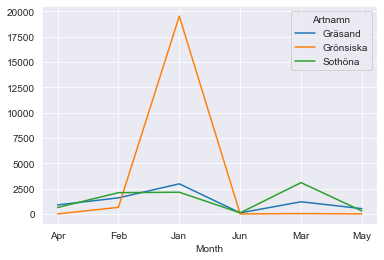

In [8]:
top3_distr.plot()